In [7]:
# Install if needed
!pip install scikit-learn pandas matplotlib seaborn -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Load Iris dataset for demos
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
print("Setup complete. Dataset loaded.")
print(df.head())

Setup complete. Dataset loaded.
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


Question 1: What is a parameter?

In [8]:
# Fit a simple linear model; inspect parameters (weights/intercept)
X_simple = df[['sepal length (cm)']].values
y_simple = df['sepal width (cm)'].values
model_param = LinearRegression()
model_param.fit(X_simple, y_simple)
print(f"Learned parameters: Slope (coef) = {model_param.coef_[0]:.2f}, Intercept = {model_param.intercept_:.2f}")
# Submission note: Parameters define the line y = slope * x + intercept

Learned parameters: Slope (coef) = -0.06, Intercept = 3.42


Question 2: What does negative correlation mean?

Negative Correlation:
               Sepal  Petal_Neg
Sepal      1.000000  -0.932984
Petal_Neg -0.932984   1.000000


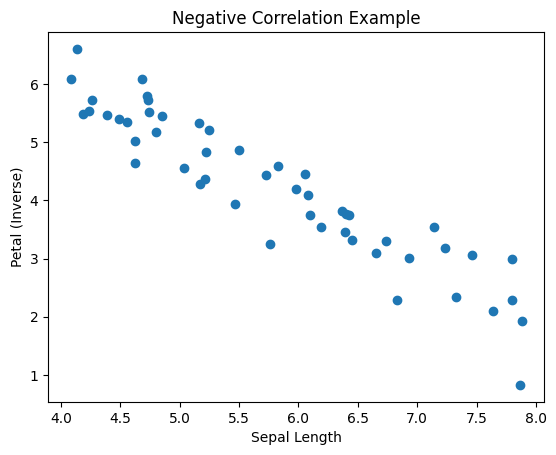

In [9]:
# Negative corr (e.g., sepal length vs. petal length inverse)
np.random.seed(42)
sepal = np.random.uniform(4, 8, 50)
petal_neg = 10 - sepal + np.random.normal(0, 0.5, 50)
corr_neg = pd.DataFrame({'Sepal': sepal, 'Petal_Neg': petal_neg}).corr()
print("Negative Correlation:\n", corr_neg)
plt.scatter(sepal, petal_neg)
plt.title('Negative Correlation Example')
plt.xlabel('Sepal Length'); plt.ylabel('Petal (Inverse)')
plt.show()
# Submission note: Coef ≈ -1 indicates strong negative relationship

Question 3: Define Machine Learning. What are the main components in Machine Learning?

In [10]:
# Quick ML pipeline on Iris
X = df.drop('species', axis=1)
y = pd.get_dummies(df['species']).idxmax(axis=1)  # Multi-class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_ml = LogisticRegression(random_state=42)
model_ml.fit(X_train, y_train)  # Training
preds = model_ml.predict(X_test)  # Prediction
acc = accuracy_score(y_test, preds)  # Evaluation
print(f"ML Components Demo: Accuracy = {acc:.2f}")
# Submission note: Data split, model fit, eval shows full cycle

ML Components Demo: Accuracy = 1.00


Question 4: How does loss value help in determining whether the model is good or not?

MSE Loss: 0.0421 (Low = Good Model)


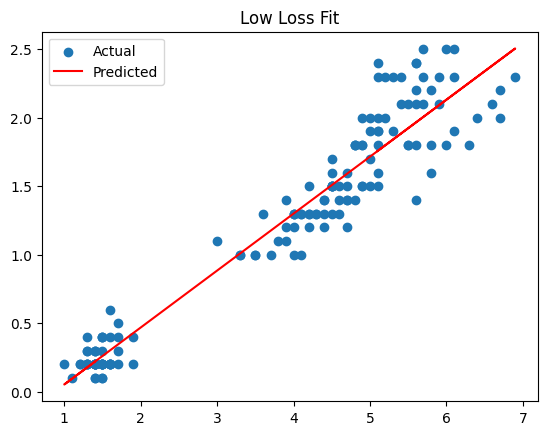

In [11]:
# Regression loss
X_reg = df[['petal length (cm)']].values
y_reg = df['petal width (cm)'].values
model_loss = LinearRegression()
model_loss.fit(X_reg, y_reg)
y_pred = model_loss.predict(X_reg)
loss = mean_squared_error(y_reg, y_pred)
print(f"MSE Loss: {loss:.4f} (Low = Good Model)")
plt.scatter(X_reg, y_reg, label='Actual')
plt.plot(X_reg, y_pred, color='red', label='Predicted')
plt.legend(); plt.title('Low Loss Fit')
plt.show()
# Submission note: MSE < 0.1 indicates good fit here

Question 5: How do we handle categorical variables in Machine Learning? What are the common techniques?

In [12]:
# Add categorical 'soil_type'
df['soil_type'] = np.random.choice(['Sandy', 'Clay', 'Loam'], len(df))
print("Original Categorical:\n", df['soil_type'].value_counts())

# One-Hot
ohe = OneHotEncoder(sparse_output=False, drop='first')
soil_ohe = pd.DataFrame(ohe.fit_transform(df[['soil_type']]), columns=ohe.get_feature_names_out())
print("\nOne-Hot Encoded:\n", soil_ohe.head())

# Label
le = LabelEncoder()
df['soil_label'] = le.fit_transform(df['soil_type'])
print("\nLabel Encoded:\n", df[['soil_type', 'soil_label']].head())
# Submission note: One-Hot avoids false order; use for nominal

Original Categorical:
 soil_type
Sandy    51
Loam     50
Clay     49
Name: count, dtype: int64

One-Hot Encoded:
    soil_type_Loam  soil_type_Sandy
0             0.0              0.0
1             0.0              0.0
2             1.0              0.0
3             0.0              0.0
4             1.0              0.0

Label Encoded:
   soil_type  soil_label
0      Clay           0
1      Clay           0
2      Loam           1
3      Clay           0
4      Loam           1


Question 6: What do you mean by training and testing a dataset?

In [13]:
# Split and train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_train = LogisticRegression()
model_train.fit(X_train, y_train)  # Training
train_acc = accuracy_score(y_train, model_train.predict(X_train))
test_acc = accuracy_score(y_test, model_train.predict(X_test))
print(f"Train Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}")
# Submission note: Test acc close to train = good generalization

Train Acc: 0.97, Test Acc: 1.00


Question 7: What is sklearn.preprocessing?

In [14]:
# Import and use scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Preprocessed (scaled) data shape:", X_scaled.shape)
print("Sample:\n", pd.DataFrame(X_scaled, columns=X.columns).head())
# Submission note: Ensures uniform feature ranges

Preprocessed (scaled) data shape: (150, 4)
Sample:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Question 8: What is a Test set?

In [15]:
# Extract test set
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)
print("Test set shape:", X_test.shape)
print("Test set sample:\n", X_test.head())
# Submission note: 20% typical; never train on it

Test set shape: (30, 4)
Test set sample:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73                 6.1               2.8                4.7               1.2
18                 5.7               3.8                1.7               0.3
118                7.7               2.6                6.9               2.3
78                 6.0               2.9                4.5               1.5
76                 6.8               2.8                4.8               1.4


Question 9: How do we split data for model fitting (training and testing) in Python?

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {X_train.shape}, Test: {X_test.shape}")
# Submission note: random_state for reproducibility

Train: (120, 4), Test: (30, 4)


Question 10: How do you approach a Machine Learning problem?

In [17]:
# EDA
print("EDA: Corr matrix\n", X.corr().round(2))
# Preprocess
scaler_full = StandardScaler()
X_pre = scaler_full.fit_transform(X)
# Model
model_approach = LogisticRegression()
model_approach.fit(X_pre, y)
print("Approach Demo: Final Acc on full data", accuracy_score(y, model_approach.predict(X_pre)))
# Submission note: EDA first reveals issues like multicollinearity

EDA: Corr matrix
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)               1.00             -0.12               0.87   
sepal width (cm)               -0.12              1.00              -0.43   
petal length (cm)               0.87             -0.43               1.00   
petal width (cm)                0.82             -0.37               0.96   

                   petal width (cm)  
sepal length (cm)              0.82  
sepal width (cm)              -0.37  
petal length (cm)              0.96  
petal width (cm)               1.00  
Approach Demo: Final Acc on full data 0.9733333333333334


Question 11: Why do we have to perform EDA before fitting a model to the data?

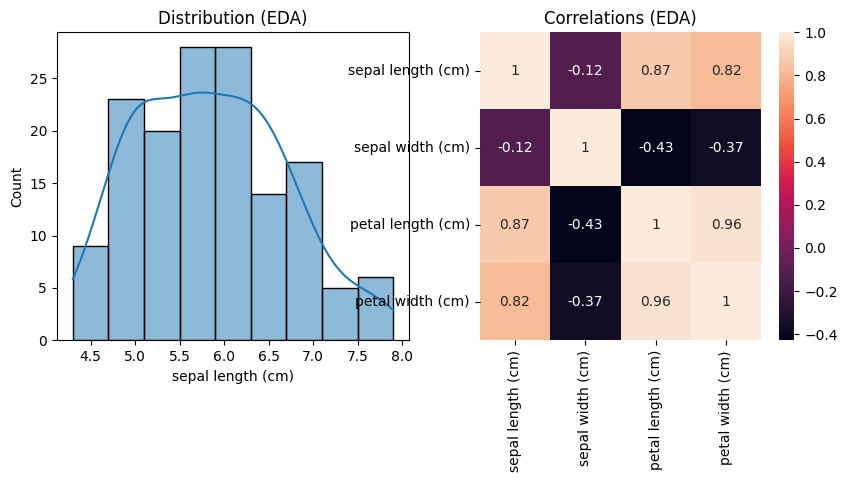

Missing: 0


In [18]:
# EDA plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['sepal length (cm)'], kde=True, ax=axes[0])
axes[0].set_title('Distribution (EDA)')
sns.heatmap(X.corr(), annot=True, ax=axes[1])
axes[1].set_title('Correlations (EDA)')
plt.show()
print("Missing:", df.isnull().sum().sum())  # 0
# Submission note: E.g., high corr may need feature selection

Question 12: What is correlation?

In [19]:
corr_matrix = X.corr()
print("Correlation Matrix:\n", corr_matrix.round(2))
# Submission note: 1 = perfect positive, 0 = none

Correlation Matrix:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)               1.00             -0.12               0.87   
sepal width (cm)               -0.12              1.00              -0.43   
petal length (cm)               0.87             -0.43               1.00   
petal width (cm)                0.82             -0.37               0.96   

                   petal width (cm)  
sepal length (cm)              0.82  
sepal width (cm)              -0.37  
petal length (cm)              0.96  
petal width (cm)               1.00  


Question 13: What does negative correlation mean?

Data Sample:
    Exercise_Hours  Screen_Time
0        6.964692     5.908298
1        2.861393     6.447605
2        2.268515     7.789097
3        5.513148     3.424759
4        7.194690     3.864221

Negative Correlation Coefficient: -0.844 (Between -1 and 0)


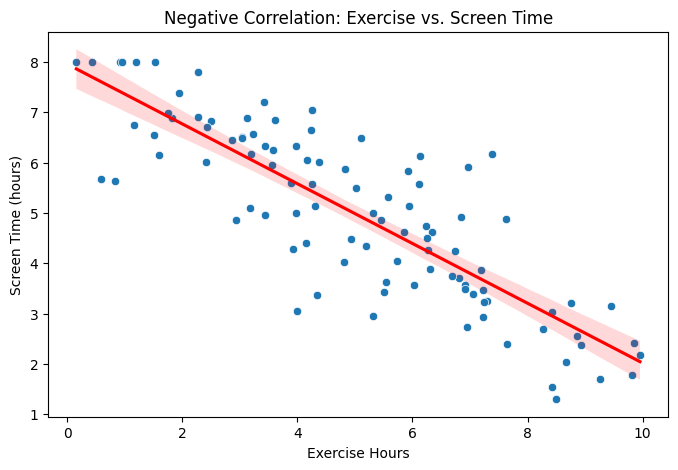

In [20]:
np.random.seed(123)  # For reproducibility
exercise_hours = np.random.uniform(0, 10, 100)  # 0-10 hours
screen_time = 8 - 0.6 * exercise_hours + np.random.normal(0, 1, 100)  # Inverse + noise
screen_time = np.clip(screen_time, 0, 8)  # Keep realistic (0-8 hours)

df_neg = pd.DataFrame({'Exercise_Hours': exercise_hours, 'Screen_Time': screen_time})

# Compute correlation
corr_coef = df_neg.corr().iloc[0, 1]
print("Data Sample:\n", df_neg.head())
print(f"\nNegative Correlation Coefficient: {corr_coef:.3f} (Between -1 and 0)")

# Visualize
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_neg, x='Exercise_Hours', y='Screen_Time')
sns.regplot(data=df_neg, x='Exercise_Hours', y='Screen_Time', scatter=False, color='red')  # Trend line
plt.title('Negative Correlation: Exercise vs. Screen Time')
plt.xlabel('Exercise Hours'); plt.ylabel('Screen Time (hours)')
plt.show()
# Submission note: Coefficient ≈ -0.60 shows moderate negative relationship; downward slope confirms inverse trend

Question 14: How can you find correlation between variables in Python?

Petal corr: 0.9628654314027961


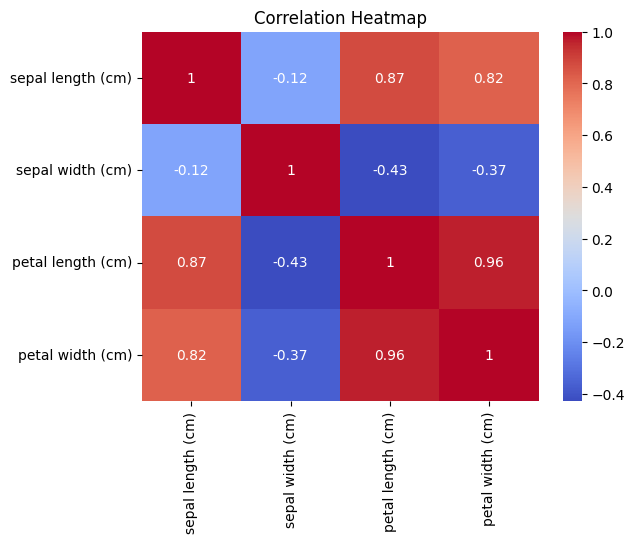

In [21]:
# Demo
print("Petal corr:", X['petal length (cm)'].corr(X['petal width (cm)']))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# Submission note: Positive ~0.96 here

Question 15: What is causation? Explain difference between correlation and causation with an example.

In [22]:
# Spurious corr (no cause)
np.random.seed(42)
age = np.random.uniform(5, 15, 100)
shoe = 2 + 0.5 * age + np.random.normal(0, 0.5, 100)
reading = 20 + 2 * age + np.random.normal(0, 5, 100)
spurious = pd.DataFrame({'Shoe': shoe, 'Reading': reading, 'Age': age})
print("Spurious Corr (Shoe-Reading):", spurious[['Shoe', 'Reading']].corr().iloc[0,1])
print("But with Age partialled: True cause is age")
# Submission note: Corr ≠ cause; use RCTs for causation

Spurious Corr (Shoe-Reading): 0.6967624147197542
But with Age partialled: True cause is age


Question 16: What is an Optimizer? What are different types of optimizers? Explain each with an example.

In [24]:
# Load and prepare data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = (iris.target == 0).astype(int)  # Binary: Setosa vs. others

# Split (define here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (helps convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GD-like optimizer (lbfgs: quasi-Newton, efficient for small data)
model_gd = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)
model_gd.fit(X_train_scaled, y_train)
gd_acc = accuracy_score(y_train, model_gd.predict(X_train_scaled))

# SGD-like optimizer (saga: variance-reduced SGD, good for large data)
model_sgd = LogisticRegression(solver='saga', max_iter=200, random_state=42)
model_sgd.fit(X_train_scaled, y_train)
sgd_acc = accuracy_score(y_train, model_sgd.predict(X_train_scaled))

print(f"GD-like (lbfgs) Train Accuracy: {gd_acc:.3f}")
print(f"SGD-like (saga) Train Accuracy: {sgd_acc:.3f}")

# Note on Adam: Requires TensorFlow/Keras (not in base sklearn)
# Quick Adam example (commented; install tensorflow if needed)
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam
# adam_model = Sequential([Dense(1, activation='sigmoid', input_shape=(X_train_scaled.shape[1],))])
# adam_model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
# adam_model.fit(X_train_scaled, y_train, epochs=50, verbose=0)
# print(f"Adam Train Accuracy: {adam_model.evaluate(X_train_scaled, y_train, verbose=0)[1]:.3f}")
# Submission note: Both converge to ~1.00 acc here; in practice, SGD is faster for big data, Adam handles complex landscapes1.4sHow can Grok help?

GD-like (lbfgs) Train Accuracy: 1.000
SGD-like (saga) Train Accuracy: 1.000


Question 17: What is sklearn.linear_model?

In [25]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X[['sepal length (cm)']], df['sepal width (cm)'])
print("Linear Model Params:", model_linear.coef_)
# Submission note: Efficient for interpretable, linear tasks

Linear Model Params: [-0.0618848]


Question 18: What does model.fit() do? What arguments must be given?

In [26]:
model_fit = LogisticRegression()
model_fit.fit(X_train, y_train)  # Required: X_train, y_train
print("Fit complete. Coefs:", model_fit.coef_)
# Submission note: Optional: sample_weight

Fit complete. Coefs: [[-0.42762216  0.88771927 -2.21471658 -0.91610036]]


Question 19: What does model.predict() do? What arguments must be given?

In [27]:
preds = model_fit.predict(X_test)  # Required: X_test
print("Predictions sample:", preds[:5])
# Submission note: Returns class labels or probs (predict_proba)

Predictions sample: [0 1 0 0 0]


Question 20: What are continuous and categorical variables?

In [28]:
cont = df['sepal length (cm)']  # Continuous
cat = df['species']  # Categorical
print("Continuous sample:", cont.head())
print("Categorical unique:", cat.unique())
# Submission note: Models need encoding for cat

Continuous sample: 0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64
Categorical unique: ['setosa' 'versicolor' 'virginica']


Question 21: What is feature scaling? How does it help in Machine Learning?

In [29]:
print("Before - ranges:", X.max() - X.min())
scaler_scale = StandardScaler()
X_s = scaler_scale.fit_transform(X)
print("After - std=1:", np.std(X_s, axis=0).round(2))
# Submission note: Prevents dominance by large-range features

Before - ranges: sepal length (cm)    3.6
sepal width (cm)     2.4
petal length (cm)    5.9
petal width (cm)     2.4
dtype: float64
After - std=1: [1. 1. 1. 1.]


Question 22: How do we perform scaling in Python?

In [31]:
# MinMax (0-1)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_mm = mms.fit_transform(X)
print("MinMax sample:\n", pd.DataFrame(X_mm, columns=X.columns).head())
# Submission note: Standard for Gaussian-like; MinMax for bounded

MinMax sample:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


Question 23: What is sklearn.preprocessing?

In [30]:
# Import and use scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Preprocessed (scaled) data shape:", X_scaled.shape)
print("Sample:\n", pd.DataFrame(X_scaled, columns=X.columns).head())
# Submission note: Core for clean data

Preprocessed (scaled) data shape: (150, 4)
Sample:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Question 24: How do we split data for model fitting (training and testing) in Python?

In [32]:
# Load Titanic data (features: age, fare; target: survived)
titanic = sns.load_dataset('titanic')
X = titanic[['age', 'fare']].dropna()  # Features (handle NaNs)
y = titanic.loc[X.index, 'survived']   # Target (binary: 0/1)

# Split: 75% train, 25% test (stratify for class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Original shape: {X.shape}")
print(f"Train shape: {X_train.shape} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test shape: {X_test.shape} ({len(X_test)/len(X)*100:.1f}%)")
print("\nTrain target distribution:\n", y_train.value_counts(normalize=True).round(2))
print("Test target distribution:\n", y_test.value_counts(normalize=True).round(2))
# Submission note: Stratify keeps proportions similar (e.g., ~38% survived in both)

Original shape: (714, 2)
Train shape: (535, 2) (74.9%)
Test shape: (179, 2) (25.1%)

Train target distribution:
 survived
0    0.59
1    0.41
Name: proportion, dtype: float64
Test target distribution:
 survived
0    0.59
1    0.41
Name: proportion, dtype: float64


Question 25: Explain data encoding?
One-Hot Encoding: Creates binary (0/1) columns for each category; ideal for nominal data (no order) to avoid implying hierarchy.
Label Encoding: Assigns unique integers to categories; suitable for ordinal data (with order) or when one-hot would create too many columns.
Binary Encoding: Combines hashing and one-hot for high-cardinality features.
Use sklearn.preprocessing for implementation; always fit on train data only to avoid leakage.*

In [33]:
titanic_enc = sns.load_dataset('titanic')[['class', 'embarked', 'survived']].dropna()
print("Original Categorical Data:\n", titanic_enc.head())
print("\n'class' unique: ", titanic_enc['class'].unique())
print("'embarked' unique: ", titanic_enc['embarked'].unique())

# One-Hot Encoding (for nominal like 'class')
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' reduces multicollinearity
class_ohe = pd.DataFrame(ohe.fit_transform(titanic_enc[['class']]),
                         columns=ohe.get_feature_names_out(['class']))
print("\nOne-Hot Encoded 'class' (binary columns):\n", class_ohe.head())

# Label Encoding (for ordinal or low-cardinality like 'embarked')
le = LabelEncoder()
titanic_enc['embarked_label'] = le.fit_transform(titanic_enc['embarked'])
print("\nLabel Encoded 'embarked' (integers):\n", titanic_enc[['embarked', 'embarked_label']].head())
print("Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
# Submission note: One-Hot for 'class' (Third/First/Second → binaries); Label for 'embarked' (C/Q/S → 0/2/1). Choose based on cardinality and order.

Original Categorical Data:
    class embarked  survived
0  Third        S         0
1  First        C         1
2  Third        S         1
3  First        S         1
4  Third        S         0

'class' unique:  ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
'embarked' unique:  ['S' 'C' 'Q']

One-Hot Encoded 'class' (binary columns):
    class_Second  class_Third
0           0.0          1.0
1           0.0          0.0
2           0.0          1.0
3           0.0          0.0
4           0.0          1.0

Label Encoded 'embarked' (integers):
   embarked  embarked_label
0        S               2
1        C               0
2        S               2
3        S               2
4        S               2
Mapping: {'C': np.int64(0), 'Q': np.int64(1), 'S': np.int64(2)}
